## !! Önemli !!
Kornia torch tensor tipini varsayılan olarak float kabul eder ;)

## !! Önemli !!
Normalizasyon renk dönüşümünden sonra uygulanır. Yoksa sadece siyah resim elde edilir.

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

import torch
import kornia
import torchvision

def hflip(input: torch.Tensor) -> torch.Tensor:
    return torch.flip(input, [-1])


def vflip(input: torch.Tensor) -> torch.Tensor:
    return torch.flip(input, [-2])


def rot180(input: torch.Tensor) -> torch.Tensor:
    return torch.flip(input, [-2, -1])


def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2, padding=5)
    out_np: np.ndarray = kornia.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis('off')
    plt.show()

In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\selcu\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
img_bgr: np.ndarray = cv2.imread("../KendiResmim.jpg", cv2.IMREAD_COLOR)
print(img_bgr.shape)

(1198, 1198, 3)


In [3]:
x_bgr: torch.Tensor = kornia.image_to_tensor(img_bgr, keepdim=False)
print(x_bgr.shape)

torch.Size([1, 3, 1198, 1198])


Create a batch of images

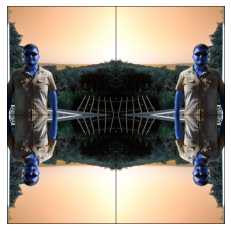

In [4]:
xb_bgr = torch.cat([x_bgr, hflip(x_bgr), vflip(x_bgr), rot180(x_bgr)])
imshow(xb_bgr)

BGR -> RGB

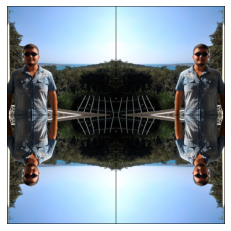

In [5]:
xb_rgb = kornia.bgr_to_rgb(xb_bgr)
imshow(xb_rgb)

BGR -> gray

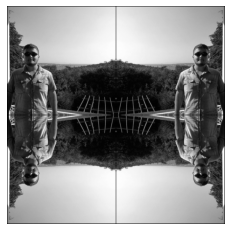

In [6]:
xb_gray = kornia.rgb_to_grayscale(xb_rgb.float() / 255.)
imshow(xb_gray)

RGB -> HSV

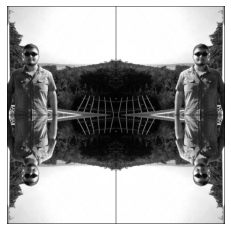

In [7]:
xb_hsv = kornia.rgb_to_hsv(xb_rgb.float() / 255.)
imshow(xb_hsv[:, 2:3])

RGB -> YUV

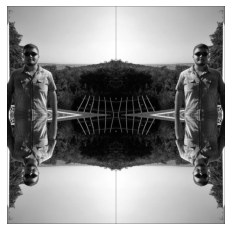

In [8]:
yuv = kornia.rgb_to_yuv(xb_rgb.float() / 255.)
y_channel = torchvision.utils.make_grid(yuv, nrow=2)[0, :, :]
plt.imshow(y_channel, cmap='gray', vmin=0, vmax=1)  # Displaying only y channel
plt.axis('off')
plt.show()